<a href="https://colab.research.google.com/github/Richard-Kyuhyong/APU/blob/Algorithms-edit1022/MonteCarlovsBootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MONTE CARLO VS BOOTSTRAPPING
BT is a special case of MC 
##### Bootstrapping in involves “replacement” and falls under the notion of a “sampling with replacement” method. 
https://pythonforfinance.net/2019/05/30/python-monte-carlo-vs-bootstrapping/


In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import pandas_datareader.data as web
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
figsize = (15, 8)

In [2]:
start, end = datetime.datetime(2010, 12, 30), datetime.datetime.now()

tickers = ["^DJI", "^IXIC", "^GSPC", "^STOXX50E", "^N225", "^GDAXI"]

asset_universe = pd.DataFrame([web.DataReader(ticker, 'yahoo', start, 
                     end).loc[:, 'Adj Close'] for ticker in tickers],
                     index=tickers).T.fillna(method='ffill')

asset_universe = asset_universe/asset_universe.iloc[0, :]
asset_universe

,^DJI,^IXIC,^GSPC,^STOXX50E,^N225,^GDAXI
Date,,,,,,
2010-12-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-12-31,1.000674,0.996204,0.999809,1.000000,1.000000,1.000000
2011-01-03,1.008733,1.010717,1.011122,1.011539,1.000000,1.010927
2011-01-04,1.010499,1.006861,1.009794,1.013227,1.016539,1.008846
2011-01-05,1.013240,1.014728,1.014850,1.009512,1.014845,1.003707
...,...,...,...,...,...,...
2020-10-20,2.446802,4.324663,2.737241,1.149920,2.303962,1.842146
2020-10-21,2.438334,4.312721,2.731230,1.133115,2.311042,1.816213
2020-10-22,2.451545,4.320727,2.745484,1.129806,2.294892,1.814104


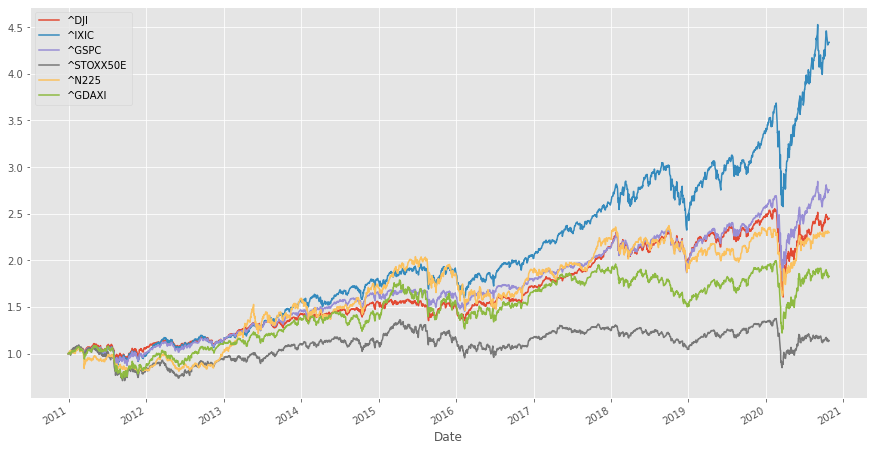

In [3]:
asset_universe.plot(figsize=figsize)

In [4]:
start, end = datetime.datetime(2020,7,15), datetime.datetime.now()

tickers = ["AAPL", "TSLA", "NVDA", "AMD", "QCOM", "AMZN",'NFLX','MSFT', 'GOOGL']

asset_universe = pd.DataFrame([web.DataReader(ticker, 'yahoo', start, 
                     end).loc[:, 'Adj Close'] for ticker in tickers],
                     index=tickers).T.fillna(method='ffill')

asset_universe = asset_universe/asset_universe.iloc[0, :]
asset_universe

,AAPL,TSLA,NVDA,AMD,QCOM,AMZN,NFLX,MSFT,GOOGL
Date,,,,,,,,,
2020-07-15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-07-16,0.987695,0.970653,0.990956,0.992411,0.985413,0.997019,1.007893,0.980196,0.998708
2020-07-17,0.985700,0.970783,0.997482,0.994579,0.996542,0.984413,0.942151,0.975197,0.999980
2020-07-20,1.006472,1.062736,1.027720,1.038309,1.006699,1.062472,0.960154,1.017112,1.030958
2020-07-21,0.992581,1.014457,1.009900,1.029996,0.997407,1.043013,0.936628,1.003413,1.025737
...,...,...,...,...,...,...,...,...,...
2020-10-19,1.188940,1.393361,1.320178,1.481749,1.395006,1.065918,1.014257,1.032195,1.008616
2020-10-20,1.204624,1.364610,1.334629,1.473798,1.393702,1.069175,1.004128,1.034267,1.022546
2020-10-21,1.198063,1.366874,1.322819,1.431153,1.396418,1.058517,0.934621,1.034990,1.045561


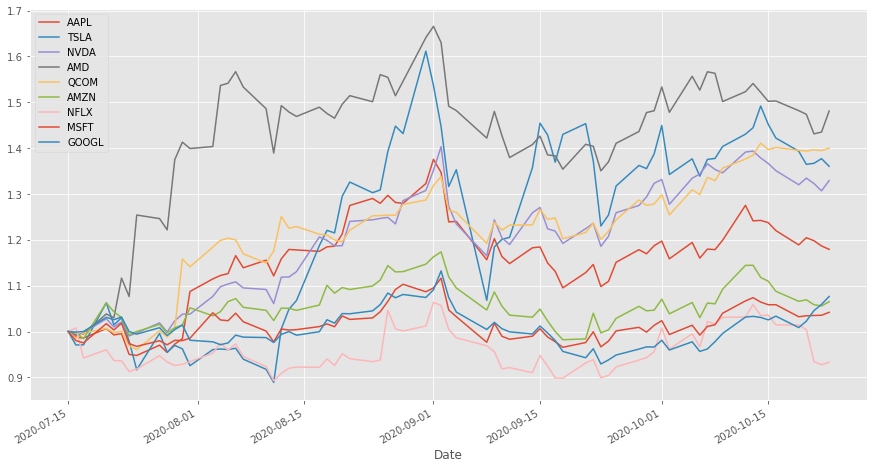

In [5]:
asset_universe.plot(figsize=figsize)

#Bootstraping
to take the correlation among assets into consideration, make a portfolio first and then bootstrap!!!  Here we choose equally weighted portfolio.

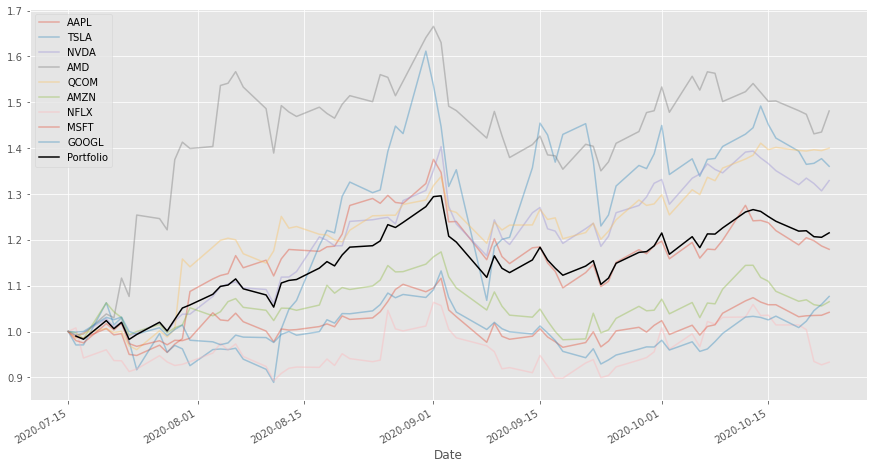

In [6]:
portfolio_returns = asset_universe.pct_change().dropna().mean(axis=1)
portfolio = (asset_universe.pct_change().dropna().mean(axis=1) + 1).cumprod()

asset_universe.plot(figsize=figsize, alpha=0.4)
portfolio.plot(label='Portfolio', color='black')
plt.legend()
plt.show()

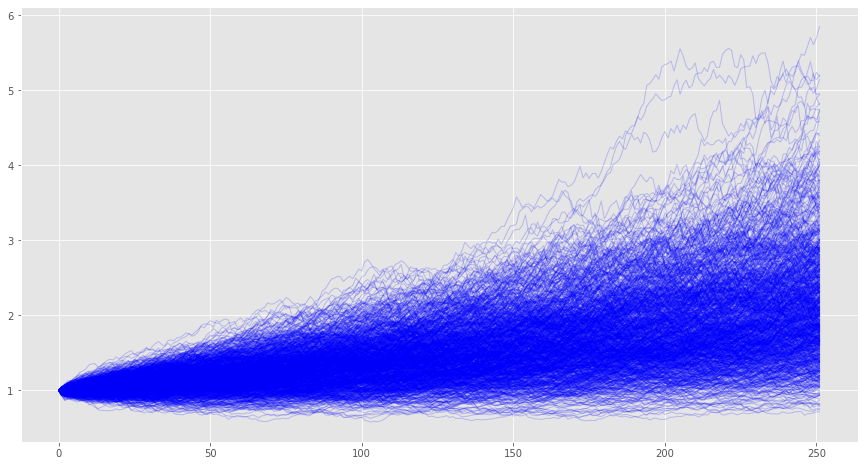

In [7]:
portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
    portfolio_returns.values), k=252) for i in 
    range(1000)]).T.shift(1).fillna(0)).cumprod()

portfolio_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='b')

take samples of our individual constituent returns series and use them to create ou Bootstrapped simulations. we end with the same result. below is th code that achieves that. 

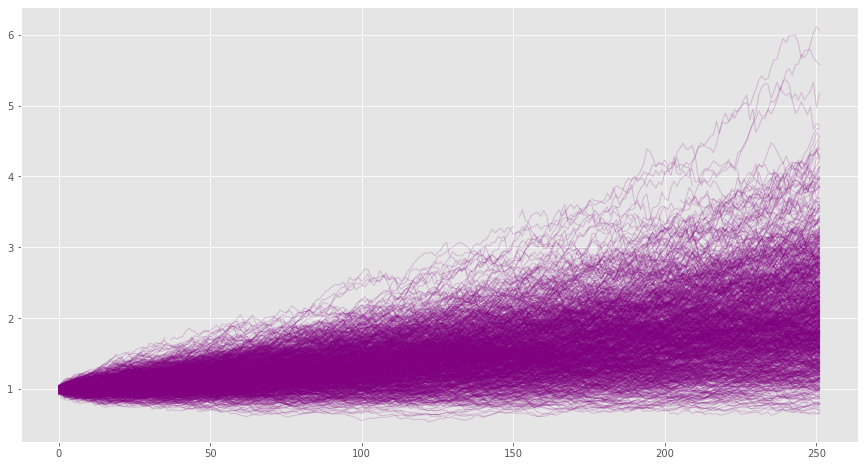

In [9]:
asset_universe_returns = asset_universe.pct_change()

portfolio_constituents_bootstrapping = pd.DataFrame([((asset_universe_returns.iloc[random.choices(
    range(len(asset_universe)), k=252)]).mean(axis=1)+1).cumprod().values 
    for x in range(1000)]).T

portfolio_constituents_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='purple')

#Monte Carlo
parametric approach: calculate mean and standard deviation from historic return distribution of the portfolio.  

In [10]:
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()


print(f'Our portfolio mean return value is {round(mu*100,2)}%')
print(f'Our portfolio standard deviation value is {round(sigma*100,2)}%')

Our portfolio mean return value is 0.3%
Our portfolio standard deviation value is 2.29%


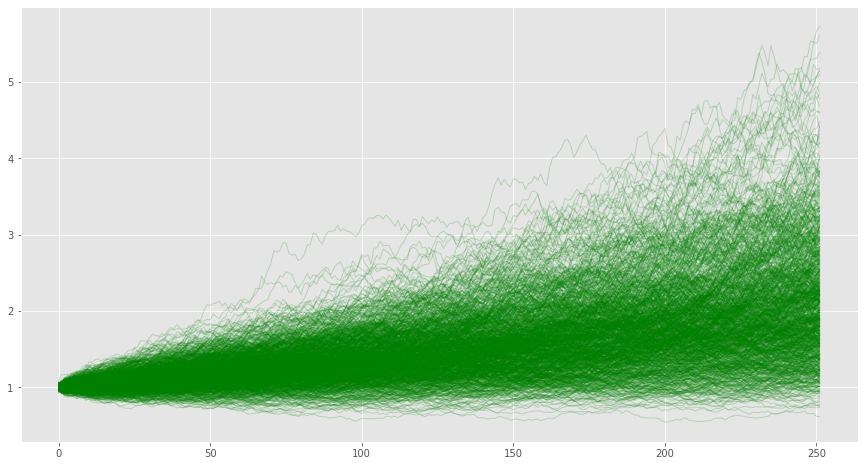

In [11]:
portfolio_mc = pd.DataFrame([(np.random.normal(loc=mu, scale=sigma, size=252)+1) for x in range(1000)]).T.cumprod()

portfolio_mc.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='green')

MC that create random draws from each individual asset distrigution and then construce pflo and see if ther is any difference in outcome.

In [12]:
for asset in (asset_universe_returns.mean() * 100).round(2).index:
    print(f'The mean return for {asset} is {(asset_universe_returns.mean() * 100).round(2)[asset]}%')
    
print('\n')

for asset in (asset_universe_returns.std() * 100).round(2).index:
    print(f'The mean return for {asset} is {(asset_universe_returns.std() * 100).round(2)[asset]}%')

The mean return for AAPL is 0.27%
The mean return for TSLA is 0.59%
The mean return for NVDA is 0.44%
The mean return for AMD is 0.63%
The mean return for QCOM is 0.51%
The mean return for AMZN is 0.12%
The mean return for NFLX is -0.06%
The mean return for MSFT is 0.08%
The mean return for GOOGL is 0.12%


The mean return for AAPL is 2.88%
The mean return for TSLA is 5.59%
The mean return for NVDA is 2.82%
The mean return for AMD is 3.99%
The mean return for QCOM is 2.79%
The mean return for AMZN is 2.4%
The mean return for NFLX is 2.93%
The mean return for MSFT is 2.11%
The mean return for GOOGL is 1.8%


Create our DataFrames of simulated asset returns for each individual asset and store them in a list.

In [13]:
asset_returns_dfs = []

for asset in asset_universe_returns.mean().index:
    mu = asset_universe_returns.mean()[asset]
    sigma = asset_universe_returns.std()[asset]
    asset_mc_rets = pd.DataFrame([(np.random.normal(loc=mu, 
                    scale=sigma, size=252)) for x in range(1000)]).T
    
    asset_returns_dfs.append(asset_mc_rets)

Use list comprehension to iterate through the list of asset return DataFrames and divide the values by the number of assets to represent an equally weighted portfolio.

In [17]:
weighted_asset_returns_dfs = [(returns_df / len(tickers)) for returns_df in asset_returns_dfs]

Add together the DataFrame values using the “reduce” function from the “functools” library (great library by the way, along with the “itertools” library. Loads of great useful functions and definitely worth checking out)


In [18]:
portfolio_constituents_mc = (reduce(lambda x, y: x + y,weighted_asset_returns_dfs) + 1).cumprod()


portfolio_constituents_mc = (reduce(lambda x, y: x + y,weighted_asset_returns_dfs) + 1).cumprod()

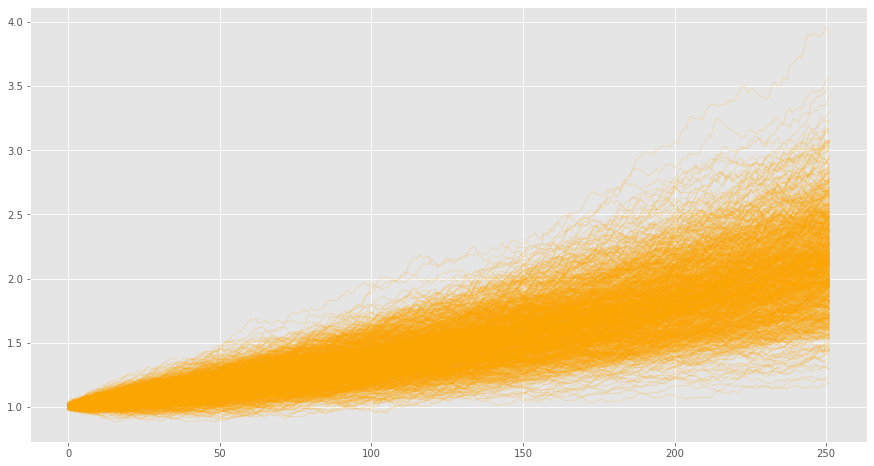

In [19]:
portfolio_constituents_mc.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='orange')


the final range is much wider for the pflo. (pflo(0.5,5), individual asset(1.5, 3.5)) individual method misses the effect of correlation. Let’s take a quick look at the historic correlations. NOTE – it is important to calculate the correlation between the asset’s RETURNS, Let’s create a nice looking little correlation heatmap to have a look.

[]

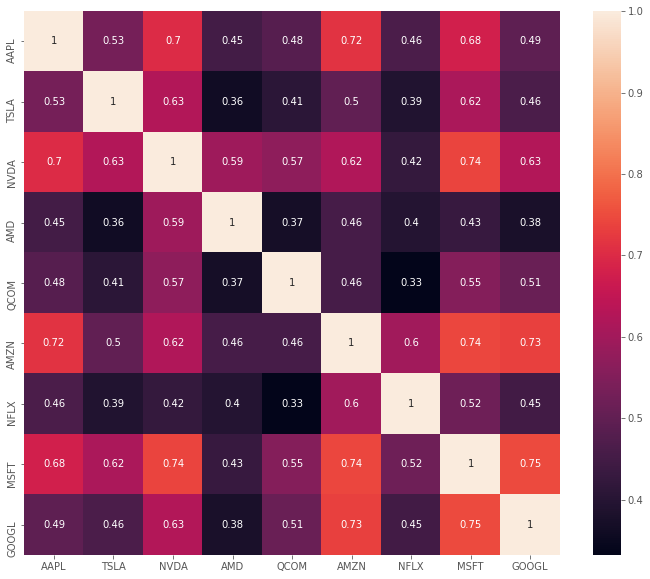

In [20]:
ax, fig = plt.subplots(figsize=(12,10))

sns.heatmap(asset_universe_returns.corr(),annot=True)
plt.plot()

we can see that all of the assets are positively correlated. portfolios which contain positively correlated assets to experience, on average, more extreme values than a portfolio of totally uncorrelated assets, or indeed that of a portfolio of negatively correlated assetscausing more volatile swings in value.